# Introduction 

Data was collected from Environment and Climate Change Canada. The data comes from the weather station at Pearson International Airport which updates the weather measurement every 5 minutes. Each individual reading is then taken and aggregated by day to output daily weather measurements.
<br></br>
<br></br>
Source of data: https://toronto.weatherstats.ca/download.html
<br></br>
Info about the dataset can be found on the about page under the links section. 
<br></br>
Goal: binary classification of precipitation. 

Variables:
- __date__: the date 
- __max_temperature__: the max temperature 
- __avg_hourly_temperature__: the average of the hourly temperature (Think, the sum of the average temperature for each hr divided by 24 hrs)
- __avg_temperature__: the average temperature for the day. Calculated using the 5 min weather updates.  
- __min_temperature__: the min temperature 
- __max_humidex__: the humidex is a meausure that indicates how hot humans feel. A value of 20-29 is comfortable, 30-39 is somewhat discomforting, 40-45 is great discomfort and 45+ is risk of heat stroke. (Source: https://www.ccohs.ca/oshanswers/phys_agents/humidex.html)
- __min_windchill__: the wind chill is a meausure of how cold humans feel given the speed speed.
- __max_relative_humidity__: the max humidity of for a day. Humidity is defined as the amount of water vapor actually in the air, expressed as a percentage of the maximum amount of water vapor the air can hold at the same temperature. (source: https://www.nationalgeographic.org/encyclopedia/humidity/)
- __avg_hourly_relative_humidity__: the average hourly humidity of for a day.
- __avg_relative_humidity__: the average humidity
- __min_relative_humidity__: the min humidity of for a day.
- __max_dew_point__: The max dew point for a day. Dew point is defined as the temperature the air needs to be cooled to, given a constant pressure, in order to achieve a relative humidity of 100%. The higher the dew point, the greater the amount of moisture in the air. (source: https://www.weather.gov/arx/why_dewpoint_vs_humidity)
- __avg_hourly_dew_point__: the average hourly dew point
- __avg_dew_point__: the average dew point
- __min_dew_point__: the min dew point
- __max_wind_speed__: the max wind speed in km/h 
- __avg_hourly_wind_speed__: the average hourly wind speed in km/h
- __avg_wind_speed__: the average wind speed in km/h
- __min_wind_speed__: the min wind speed in km/h
- __max_wind_gust__: The highest wind gust (in km/h) recorded for the day. A wind gust is defined as a 20 second increase in wind speed above 16 knots with lulls of at least 9 knots (source: https://graphical.weather.gov/definitions/defineWindGust.html#:~:text=Wind%20Gust%20Definition&text=Is%20a%20sudden%2C%20brief%20increase,is%20at%20least%209%20knots.)
- __wind_gust_dir_10s__: the direction of the wind in degrees. A value of 24 indicates that gust came from the direction of 240 degrees on a compass, roughly South West (source: https://toronto.weatherstats.ca/charts/wind_gust-daily.html)
- __max_pressure_sea__: The max sea-level pressure  for a day. The sea-level pressure is a reduced pressure reading that estimates the pressure that would exist at sea level. (Source: https://www.weather.gov/bou/pressure_definitions)
- __avg_hourly_pressure_sea__: The average hourly sea-level pressure for a day; measured in kPa.
- __avg_pressure_sea__: The average sea-level pressure  for a day; measured in kPA.
- __min_pressure_sea__: The min sea-level pressure  for a day; measured in kPA.
- __max_pressure_station__: the max station pressure. The pressure observed at a specific elevation, aka the true barometric pressure of a location. Measured in kPa. (source: https://www.weather.gov/bou/pressure_definitions#:~:text=STATION%20PRESSURE%3A%20This%20is%20the,lies%20directly%20above%20the%20point.)
- __avg_hourly_pressure_station__: the average station pressure 
- __avg_pressure_station__: the average station pressure 
- __min_pressure_station__: the min station pressure 
- __max_visibility__: The distance an object can be clearly; seen measured in meters. (Source: www.definitions.net )
- __avg_hourly_visibility__: measured in meters
- __avg_visibility__: measured in meters
- __min_visibility__: measured in meters
- __max_health_index__: the max air quality health index for the day where 1-3 is low risk, 4-6 is moderate risk, 7-70 is high risk and 10+ is very high risk (source: https://weather.gc.ca/airquality/pages/provincial_summary/on_e.html)
- __avg_hourly_health_index__: the average hourly air quality health index for the day
- __avg_health_index__: the average air quality health index for the day
- __min_health_index__: the min air quality health index for the day
- __heatdegdays__: Heating Degree Days are a measure of how cold the temperature was for a given day 
- __cooldegdays__: Cooling degree days are a measure of how hot the temperature was for a gien day. Higher number means hotter a day. (source: https://www.eia.gov/energyexplained/units-and-calculators/degree-days.php)
- __growdegdays_5__: Growth Degree Days is the average daily temperature accounting for the minnimum develpment threshold at which crops grow. The 5 indicates that the threshold is 5 degrees. This the temperature needed for most plants to grow (Source: https://extension.psu.edu/understanding-growing-degree-days , https://open.canada.ca/data/en/dataset/c7b40829-bacb-4f67-a19b-e090b3d32992?activity_id=f4eda732-4086-4afc-a84f-777248b93192)
- __growdegdays_7__: Growth Degree Days with a threshold of 7 degrees.
- __growdegdays_10__: Growth Degree Days with a threshold of 10 degrees. This is the temperature needed for beans and grasshoppers to grow.
- __precipitation__: the amount of rain and snow that fell for a given day  in mm
- __rain__: the amount of rainfall in mm for a given day
- __snow__: the amouny of snowfall in mm for a given day 
- __snow_on_ground__: the amount of snow on the ground in mm
- __sunrise__: the time that sunrise occurs
- __sunset__: the time that sunset occurs 
- __daylight__: the time in hours between sunset and sunrise 
- __sunrise_f__: the forecasted sunrise
- __sunset_f__: the forecasted sunset
- __min_uv_forecast__: the min forecasted UV index 
- __max_uv_forecast__: the max forecasted UV index forecast 
- __min_high_temperature_forecast__: the min forecasted high temperature
- __max_high_temperature_forecast__: the max forecasted high temperature
- __min_low_temperature_forecast__: the min forecasted low temperature
- __max_low_temperature_forecast__: the max forecasted low temperature
- __solar_radiation__: the amount of energy emitted from the sun. (Source: https://ambientweather.com/solarradiation.html)
- max_cloud_cover_4
- avg_hourly_cloud_cover_4
- avg_cloud_cover_4
- min_cloud_cover_4
- __max_cloud_cover_8__: the highest cloud coverage value on the cloud coverage eights scale, also called Oktas scale. Each value of the sclae represents an amount of cloud coverage where 0= clear skys, 4= half cloud, and 8= completely cloudy. (Source: https://polarpedia.eu/en/okta-scale/)
- __avg_hourly_cloud_cover_8__: the average hourly cloud coverage value on the Oktas scale
- __avg_cloud_cover_8__: the average cloud coverage value on the Oktas scale
- __min_cloud_cover_8__: the min cloud coverage value on the Oktas scale
- max_cloud_cover_10: 
- avg_hourly_cloud_cover_10
- avg_cloud_cover_10
- min_cloud_cover_10

<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
# Load the data 

In [14]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
dataset = pd.read_csv("data/weatherstats_toronto_daily.csv")
dataset.head(10)

C:\Users\Dwight\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (46,47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,date,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,max_humidex,min_windchill,max_relative_humidity,avg_hourly_relative_humidity,avg_relative_humidity,...,avg_cloud_cover_4,min_cloud_cover_4,max_cloud_cover_8,avg_hourly_cloud_cover_8,avg_cloud_cover_8,min_cloud_cover_8,max_cloud_cover_10,avg_hourly_cloud_cover_10,avg_cloud_cover_10,min_cloud_cover_10
0,2021-06-29,32.5,24.41,26.80,21.1,41.0,NaN,96,82.3,77.0,...,NaN,NaN,8.0,6.0,5.5,3.0,NaN,NaN,NaN,NaN
1,2021-06-28,32.2,27.49,26.95,21.7,39.0,NaN,86,63.6,66.0,...,NaN,NaN,6.0,3.5,3.5,1.0,NaN,NaN,NaN,NaN
2,2021-06-27,30.7,27.40,27.25,23.8,39.0,NaN,73,63.4,63.5,...,NaN,NaN,8.0,4.9,4.5,1.0,NaN,NaN,NaN,NaN
3,2021-06-26,27.5,23.97,23.25,19.0,36.0,NaN,100,82.5,83.0,...,NaN,NaN,8.0,7.8,7.5,7.0,NaN,NaN,NaN,NaN
4,2021-06-25,25.8,21.24,22.30,18.8,30.0,NaN,100,74.0,75.0,...,NaN,NaN,8.0,7.7,6.5,5.0,NaN,NaN,NaN,NaN
5,2021-06-24,28.1,22.42,22.00,15.9,30.0,NaN,70,50.5,51.0,...,NaN,NaN,8.0,5.8,5.0,2.0,NaN,NaN,NaN,NaN
6,2021-06-23,23.7,17.55,16.25,8.8,NaN,NaN,79,53.1,57.0,...,NaN,NaN,6.0,3.4,3.5,1.0,NaN,NaN,NaN,NaN
7,2021-06-22,19.5,14.46,14.75,10.0,NaN,NaN,94,54.8,63.0,...,NaN,NaN,8.0,5.8,5.0,2.0,NaN,NaN,NaN,NaN
8,2021-06-21,29.7,21.06,20.65,11.6,34.0,NaN,100,74.9,72.5,...,NaN,NaN,8.0,7.0,5.5,3.0,NaN,NaN,NaN,NaN
9,2021-06-20,27.1,21.15,20.55,14.0,32.0,NaN,91,68.2,71.0,...,NaN,NaN,8.0,3.8,4.0,0.0,NaN,NaN,NaN,NaN


The above table is a subset of the first 10 rows of the dataset. As we can see, the dataset is ordered in reverse chronological order with 70 columns and 10,000 rows. We are also able to observe that every column except for the `date`, `sunrise`, and `sunset` columns are numerical in nature. Moreover, we are able to see that the dataset has quite a few missing values.  

In [16]:
dataset.shape

(10000, 70)

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 70 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           10000 non-null  object 
 1   max_temperature                10000 non-null  float64
 2   avg_hourly_temperature         10000 non-null  float64
 3   avg_temperature                10000 non-null  float64
 4   min_temperature                10000 non-null  float64
 5   max_humidex                    2783 non-null   float64
 6   min_windchill                  3354 non-null   float64
 7   max_relative_humidity          10000 non-null  int64  
 8   avg_hourly_relative_humidity   10000 non-null  float64
 9   avg_relative_humidity          10000 non-null  float64
 10  min_relative_humidity          10000 non-null  int64  
 11  max_dew_point                  10000 non-null  float64
 12  avg_hourly_dew_point           10000 non-null  

<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
# Validate the Integrity of the data 

### Missing Values 


In [18]:
def find_missing_vals(dataset):
    '''Display columsn with missing data and indicate how many values are missing for each column.'''
    missing_vals = dataset.isnull().sum()
    cols_list = dataset.columns
    col_count = 0

    for col, val in zip(cols_list, missing_vals):
        if val > 0:
            print('{}: {} values misiing'.format(col, val))
            col_count += 1
    print('\n{} columns have missing values'.format(col_count))
    return zip(cols_list, missing_vals)

In [19]:
find_missing_vals(dataset)

max_humidex: 7217 values misiing
min_windchill: 6646 values misiing
max_wind_gust: 3061 values misiing
wind_gust_dir_10s: 3062 values misiing
max_health_index: 6277 values misiing
avg_hourly_health_index: 6277 values misiing
avg_health_index: 6277 values misiing
min_health_index: 6277 values misiing
precipitation: 21 values misiing
rain: 30 values misiing
snow: 22 values misiing
snow_on_ground: 2169 values misiing
sunrise: 7263 values misiing
sunset: 7263 values misiing
daylight: 7263 values misiing
sunrise_f: 7263 values misiing
sunset_f: 7263 values misiing
min_uv_forecast: 7895 values misiing
max_uv_forecast: 7895 values misiing
min_high_temperature_forecast: 7263 values misiing
max_high_temperature_forecast: 7263 values misiing
min_low_temperature_forecast: 7263 values misiing
max_low_temperature_forecast: 7263 values misiing
solar_radiation: 10000 values misiing
max_cloud_cover_4: 10000 values misiing
avg_hourly_cloud_cover_4: 10000 values misiing
avg_cloud_cover_4: 10000 values m

#### Explaining missing values 

We see that 36 columns in the dataset contain missing values and 34 columns have no missing values. Recall there are 10000 rows in the dataset, meaning that 5 columns have no entries and 23 columns conatain more than 6000 missing values.  

The `percipitation`, `rain` and `snow` columns have the least missing of columns that conain missing values. These columns contain less than 30 missing values.  

In [20]:
cloud_not_missing = dataset[dataset.avg_hourly_cloud_cover_8.notnull()]
cloud_not_missing[['date', 'max_cloud_cover_8', 'avg_hourly_cloud_cover_8', 'avg_cloud_cover_8', 'min_cloud_cover_8']]

,date,max_cloud_cover_8,avg_hourly_cloud_cover_8,avg_cloud_cover_8,min_cloud_cover_8
0,2021-06-29,8.0,6.0,5.5,3.0
1,2021-06-28,6.0,3.5,3.5,1.0
2,2021-06-27,8.0,4.9,4.5,1.0
3,2021-06-26,8.0,7.8,7.5,7.0
4,2021-06-25,8.0,7.7,6.5,5.0
...,...,...,...,...,...
2816,2013-10-13,8.0,7.3,5.5,3.0
2817,2013-10-12,4.0,1.6,2.5,1.0
2818,2013-10-11,2.0,1.5,1.5,1.0
2819,2013-10-10,8.0,3.2,4.5,1.0


Cloud coverage data wasnt collected by the weather station using the Oktas scale until October 9, 2013. That means we have data from October 9, 2013 to June 29th, 2021 abput weather coverage in the following variables: `max_cloud_cover_8`, 
                `avg_hourly_cloud_cover_8`, `avg_cloud_cover_8`, `min_cloud_cover_8`. 

In [21]:
sun_not_missing = dataset[dataset.sunrise.notnull()]
sun_not_missing[['date', 'sunrise', 'sunset', 'daylight']]

,date,sunrise,sunset,daylight
0,2021-06-29,5:39:00,21:04:00,15.42
1,2021-06-28,5:38:00,21:04:00,15.43
2,2021-06-27,5:38:00,21:04:00,15.43
3,2021-06-26,5:37:00,21:04:00,15.45
4,2021-06-25,5:37:00,21:04:00,15.45
...,...,...,...,...
2732,2014-01-05,7:51:00,16:55:00,9.07
2733,2014-01-04,7:52:00,16:54:00,9.03
2734,2014-01-03,7:52:00,16:53:00,9.02
2735,2014-01-02,7:52:00,16:52:00,9.00


Data related to sunlight wasnt collected by this weather station until January 1st, 2014. Therefore any data related to ant time before January 1st, 2014 for the `date`, `sunrise`, `sunset` and `daylight` variables will be considered missing. 

In [22]:
healthindex_not_missing = dataset[dataset.max_health_index.notnull()]
healthindex_not_missing[['date', 'max_health_index', 'avg_hourly_health_index', 'avg_health_index', 'min_health_index']]

,date,max_health_index,avg_hourly_health_index,avg_health_index,min_health_index
0,2021-06-29,3.4,2.3,2.5,1.5
1,2021-06-28,3.2,2.6,2.6,2.1
2,2021-06-27,3.1,2.8,2.8,2.4
3,2021-06-26,3.0,2.6,2.6,2.2
4,2021-06-25,3.8,3.1,3.2,2.6
...,...,...,...,...,...
3719,2011-04-24,4.0,2.9,3.2,2.4
3720,2011-04-23,3.6,2.8,3.0,2.3
3721,2011-04-22,3.8,3.2,3.3,2.8
3722,2011-04-21,3.7,3.1,3.1,2.6


No data wass collected about the air quality health index before April 20th, 2011. Therefore there will be missing values in the `max_health_index`, `avg_hourly_health_index`, `avg_health_index`, `min_health_index` columns. 

#### Removing missing values 

In [23]:
#drop columns that have more than 60% of their values missing 
#also drop columns irrelevant for analysis, such as snow_on_ground 
dropped_cols = ['max_humidex', 'min_windchill', 'max_health_index', 'avg_hourly_health_index', 'avg_health_index',
               'min_health_index', 'sunrise', 'sunset', 'daylight', 'sunrise_f', 'sunset_f', 'min_uv_forecast',
               'max_uv_forecast', 'min_high_temperature_forecast', 'max_high_temperature_forecast',
                'min_low_temperature_forecast', 'max_low_temperature_forecast', 'solar_radiation', 'max_cloud_cover_4',
               'avg_hourly_cloud_cover_4', 'avg_cloud_cover_4', 'min_cloud_cover_4', 'max_cloud_cover_8', 
                'avg_hourly_cloud_cover_8', 'avg_cloud_cover_8', 'min_cloud_cover_8', 'max_cloud_cover_10', 
               'avg_hourly_cloud_cover_10', 'avg_cloud_cover_10', 'min_cloud_cover_10', 'snow_on_ground']
data_reduced = dataset.drop(columns=dropped_cols)

In [24]:
data_reduced.shape 

(10000, 39)

In [25]:
find_missing_vals(data_reduced)

max_wind_gust: 3061 values misiing
wind_gust_dir_10s: 3062 values misiing
precipitation: 21 values misiing
rain: 30 values misiing
snow: 22 values misiing

5 columns have missing values


By removing columns that have more than 60% of their data missing, the dataset is left with 40 columns. Luckily the leftover columns with missing values can be calculated from the other data in the dataset. For example, `percipitation` is the sum of rain and snow, while `snow_on_ground` is a function of snow and temperature. Meaning, we can easily impute the values to make the dataset clean. 

In [26]:
#find leftover missing values in the precipitation columns 
precip_missing = data_reduced[['date', 'precipitation', 'rain', 'snow']]

In [27]:
#since there are only a few missing values from the precipitation column, 
#check where they exist and if they can be calculated 
precip_missing.loc[precip_missing.precipitation.isna()]

,date,precipitation,rain,snow
131,2021-02-18,NaN,NaN,NaN
132,2021-02-17,NaN,NaN,NaN
1089,2018-07-06,NaN,NaN,NaN
1575,2017-03-07,NaN,NaN,NaN
1954,2016-02-22,NaN,NaN,0.0
1957,2016-02-19,NaN,NaN,0.0
2136,2015-08-24,NaN,NaN,NaN
2140,2015-08-20,NaN,NaN,NaN
2154,2015-08-06,NaN,NaN,0.0
2283,2015-03-30,NaN,NaN,0.0


In [28]:
def precip_fill_na(dataset): 
    '''Imputes missing values in the precipitation column of a weather dataset by using the the relationship 
    between precipitation, rain and snow. Mainly that precipitation = rain + snow. '''
    new_col = []
    # iterate through every row 
    for i in range(len(dataset)):
        row = dataset.iloc[i]
        #if a missing value is found in the precipitation column, try to impute it 
        if np.isnan(row.precipitation):
            if np.isnan(row.rain):
                val = row['snow']
                new_col.append(val)
            elif np.isnan(row.snow):
                val = row['rain']
                new_col.append(val)
            else:
                val = row['rain'] + row['snow']
                new_col.append(val)
        #if no missing value is found return the same value for that row 
        else:
            new_col.append(row.precipitation)
    #place the new calculated rows into the precipitation column 
    dataset[['precipitation']] = new_col
    return dataset

In [29]:
# check if imputation of missing values work on a small subset of the data
precip_new = precip_fill_na(precip_missing)
precip_new.loc[precip_new.precipitation.isna()]

<ipython-input-28-f380ea6c8320>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[['precipitation']] = new_col
C:\Users\Dwight\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,date,precipitation,rain,snow
131,2021-02-18,NaN,NaN,NaN
132,2021-02-17,NaN,NaN,NaN
1089,2018-07-06,NaN,NaN,NaN
1575,2017-03-07,NaN,NaN,NaN
2136,2015-08-24,NaN,NaN,NaN
2140,2015-08-20,NaN,NaN,NaN
2349,2015-01-23,NaN,NaN,NaN
2798,2013-10-31,NaN,NaN,NaN
2810,2013-10-19,NaN,NaN,NaN
2816,2013-10-13,NaN,NaN,NaN


In [30]:
# impute missing values in the dataset 
data_reduced = precip_fill_na(data_reduced)
# drop the rain and snow columns 
data_reduced.drop(columns=['rain', 'snow'], inplace=True)
#drop rows with missing values
data_reduced.dropna(inplace=True)
data_reduced.shape

(6930, 37)

In [31]:
find_missing_vals(data_reduced)


0 columns have missing values


All missing values have been removed resulting in a dataset of 37 columns and 6930 rows. 

<br></br>
<br></br>
<br></br>
<br></br>
### Range of Values 

In [32]:
# suppress scientific notation
pd.options.display.float_format = '{:.2f}'.format
data_reduced.describe()

,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,max_relative_humidity,avg_hourly_relative_humidity,avg_relative_humidity,min_relative_humidity,max_dew_point,avg_hourly_dew_point,...,max_visibility,avg_hourly_visibility,avg_visibility,min_visibility,heatdegdays,cooldegdays,growdegdays_5,growdegdays_7,growdegdays_10,precipitation
count,6930.00,6930.00,6930.00,6930.00,6930.00,6930.00,6930.00,6930.00,6930.00,6930.00,...,6930.00,6930.00,6930.00,6930.00,6930.00,6930.00,6930.00,6930.00,6930.00,6930.00
mean,12.87,8.36,8.24,3.60,85.33,69.22,68.92,52.51,5.99,2.59,...,25647.48,21493.92,19940.41,14233.35,10.79,1.02,6.33,5.21,3.76,2.57
std,11.62,10.73,10.79,10.23,9.92,11.84,10.80,14.20,9.94,10.18,...,5328.93,5045.50,5461.44,8920.90,9.45,2.27,7.22,6.48,5.31,6.02
min,-19.10,-21.95,-22.30,-26.30,38.00,27.70,29.50,14.00,-24.80,-28.10,...,4800.00,1233.30,3000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,3.23,0.13,-0.03,-3.60,79.00,61.60,62.00,42.00,-1.50,-4.97,...,24100.00,19146.85,15250.00,4800.00,0.40,0.00,0.00,0.00,0.00,0.00
50%,12.70,8.01,7.94,3.30,87.00,69.50,69.00,52.00,5.90,2.30,...,24100.00,23366.70,20100.00,16100.00,10.10,0.00,2.90,0.90,0.00,0.00
75%,23.10,17.89,17.60,12.38,93.00,77.20,76.50,62.00,14.40,11.10,...,24100.00,24100.00,24100.00,24100.00,18.00,0.00,12.60,10.60,7.60,2.00
max,37.90,31.70,31.95,26.30,100.00,99.00,98.50,97.00,26.60,24.40,...,80500.00,35857.10,52300.00,25000.00,40.30,13.90,26.90,24.90,21.90,126.00


Note that we cannot see all the values for each column so we must split the data up into chunks so we can view the distribution data of each column.

In [33]:
#analyzing temperature and humidity 
cols = data_reduced.columns[:9]
data_reduced[cols].describe()

,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,max_relative_humidity,avg_hourly_relative_humidity,avg_relative_humidity,min_relative_humidity
count,6930.00,6930.00,6930.00,6930.00,6930.00,6930.00,6930.00,6930.00
mean,12.87,8.36,8.24,3.60,85.33,69.22,68.92,52.51
std,11.62,10.73,10.79,10.23,9.92,11.84,10.80,14.20
min,-19.10,-21.95,-22.30,-26.30,38.00,27.70,29.50,14.00
25%,3.23,0.13,-0.03,-3.60,79.00,61.60,62.00,42.00
50%,12.70,8.01,7.94,3.30,87.00,69.50,69.00,52.00
75%,23.10,17.89,17.60,12.38,93.00,77.20,76.50,62.00
max,37.90,31.70,31.95,26.30,100.00,99.00,98.50,97.00


Based on hostorical temperature data from CurrentResults.com we know that the lowest temperature ever recorded in Toronto is -33 degrees Celsius and the highest temperature ever recorded was 41 degrees Celsius. Therefore we can conclude that the columns representing temperature have valid data. Moreover, we know that humidity is represented by a percentage, thus since we have values between 27 and 100 percent, we can infer that the values are valid . 

In [34]:
#dew point and wind speed
cols = data_reduced.columns[9:19]
data_reduced[cols].describe()

,max_dew_point,avg_hourly_dew_point,avg_dew_point,min_dew_point,max_wind_speed,avg_hourly_wind_speed,avg_wind_speed,min_wind_speed,max_wind_gust,wind_gust_dir_10s
count,6930.00,6930.00,6930.00,6930.00,6930.00,6930.00,6930.00,6930.00,6930.00,6930.00
mean,5.99,2.59,2.55,-0.88,32.70,18.54,19.53,6.36,46.94,24.28
std,9.94,10.18,10.09,10.53,9.31,6.25,6.18,5.22,12.79,9.13
min,-24.80,-28.10,-28.10,-32.00,12.00,5.21,6.50,0.00,27.00,0.00
25%,-1.50,-4.97,-5.07,-8.50,26.00,13.97,15.00,3.00,37.00,21.00
50%,5.90,2.30,2.40,-1.20,32.00,17.62,18.50,6.00,44.00,27.00
75%,14.40,11.10,11.10,7.80,38.00,22.04,23.00,9.00,54.00,31.00
max,26.60,24.40,24.10,23.00,85.00,55.12,53.00,39.00,119.00,36.00


The dew point is the temperature value needed to achiveve a humidity of 100%. As such, we should expect the dew point to be between the lowest and highest temperature observed in Toronto. As a result, we can conclude that the dew point is within the realm of possible values and thus valid. 

In [35]:
#analyzing sea pressure and station pressure
cols = data_reduced.columns[19:27]
data_reduced[cols].describe()

,max_pressure_sea,avg_hourly_pressure_sea,avg_pressure_sea,min_pressure_sea,max_pressure_station,avg_hourly_pressure_station,avg_pressure_station,min_pressure_station
count,6930.00,6930.00,6930.00,6930.00,6930.00,6930.00,6930.00,6930.00
mean,101.91,101.50,101.50,101.08,99.78,99.39,99.38,98.99
std,0.73,0.74,0.71,0.79,0.69,0.71,0.68,0.77
min,99.53,98.86,98.78,97.98,97.45,96.74,96.70,95.91
25%,101.43,101.03,101.04,100.61,99.33,98.95,98.96,98.53
50%,101.86,101.48,101.48,101.10,99.75,99.39,99.38,99.02
75%,102.37,101.96,101.94,101.58,100.22,99.84,99.81,99.49
max,104.67,104.41,104.38,104.08,102.41,102.15,102.12,101.85


Pressure is measured in kPa, with the highest pressure ever recorded being 108.4 kPa and the lowest pressure ever recorded in the world being 87 kPa (source: https://sciencing.com/barometer-5047250.html). Given this info, we conclude that the pressure columns have valid values. 

In [36]:
#analyzing visibility and heat degree days
cols = data_reduced.columns[27:36]
data_reduced[cols].describe()

,max_visibility,avg_hourly_visibility,avg_visibility,min_visibility,heatdegdays,cooldegdays,growdegdays_5,growdegdays_7,growdegdays_10
count,6930.00,6930.00,6930.00,6930.00,6930.00,6930.00,6930.00,6930.00,6930.00
mean,25647.48,21493.92,19940.41,14233.35,10.79,1.02,6.33,5.21,3.76
std,5328.93,5045.50,5461.44,8920.90,9.45,2.27,7.22,6.48,5.31
min,4800.00,1233.30,3000.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,24100.00,19146.85,15250.00,4800.00,0.40,0.00,0.00,0.00,0.00
50%,24100.00,23366.70,20100.00,16100.00,10.10,0.00,2.90,0.90,0.00
75%,24100.00,24100.00,24100.00,24100.00,18.00,0.00,12.60,10.60,7.60
max,80500.00,35857.10,52300.00,25000.00,40.30,13.90,26.90,24.90,21.90


In [37]:
#analyzing percipitation 
cols = data_reduced.columns[36:]
data_reduced[cols].describe()

,precipitation
count,6930.00
mean,2.57
std,6.02
min,0.00
25%,0.00
50%,0.00
75%,2.00
max,126.00


Based on hostorical temperature data from CurrentResults.com we know that the most amount of snow that ever fell in a single day for the city of Toronto is 483 mm. We also know that the most amount of rainfall experienced in Toronto for a single day was 98.6 mm. We also know that the percipitation category is the result of the sum of the rain and snow columns.

Given this information we can conclude that the `percipitation` columns all have valid values. 

<br></br>
<br></br>
<br></br>
### Outlier Analysis 

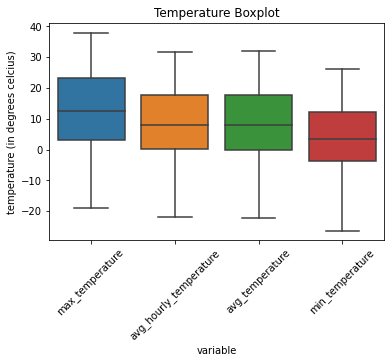

In [38]:
#boxplot for temperature data 
cols = ['max_temperature','avg_hourly_temperature','avg_temperature','min_temperature']
temp_box_data = data_reduced.melt(id_vars='date', value_vars= cols)
sns.boxplot(x='variable', y='value', data= temp_box_data)
plt.xticks(rotation=45)
plt.ylabel('temperature (in degrees celcius)')
plt.title('Temperature Boxplot')
plt.show()

The min_temperature varibale has an outlier below the -20 degrees celcius temperature. All other temerature variables have no outliers.  

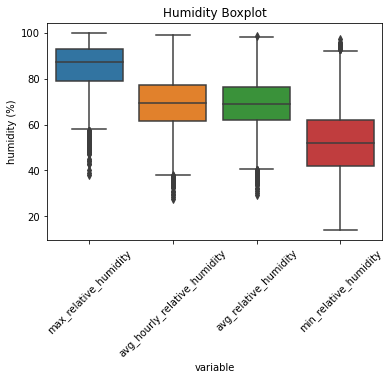

In [39]:
# boxplot for humidity 
cols = ['max_relative_humidity','avg_hourly_relative_humidity','avg_relative_humidity','min_relative_humidity']
hum_box_data = data_reduced.melt(id_vars='date', value_vars= cols)
sns.boxplot(x='variable', y='value', data= hum_box_data)
plt.xticks(rotation=45)
plt.ylabel('humidity (%)')
plt.title('Humidity Boxplot')
plt.show()

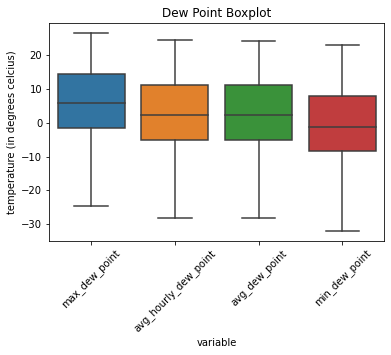

In [40]:
# boxplot for dew point
cols = ['max_dew_point','avg_hourly_dew_point','avg_dew_point','min_dew_point']
dew_box_data = data_reduced.melt(id_vars='date', value_vars= cols)
sns.boxplot(x='variable', y='value', data= dew_box_data)
plt.xticks(rotation=45)
plt.ylabel('temperature (in degrees celcius)')
plt.title('Dew Point Boxplot')
plt.show()

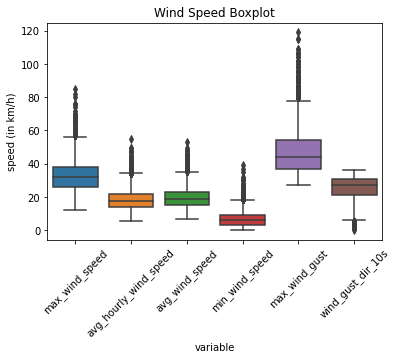

In [41]:
# boxplot for wind speed
cols = ['max_wind_speed','avg_hourly_wind_speed','avg_wind_speed','min_wind_speed','max_wind_gust','wind_gust_dir_10s']
wind_box_data = data_reduced.melt(id_vars='date', value_vars= cols)
sns.boxplot(x='variable', y='value', data= wind_box_data)
plt.xticks(rotation=45)
plt.ylabel('speed (in km/h)')
plt.title('Wind Speed Boxplot')
plt.show()

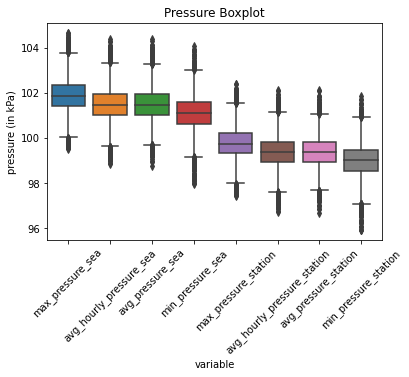

In [42]:
# boxplot for pressure
cols = ['max_pressure_sea','avg_hourly_pressure_sea','avg_pressure_sea','min_pressure_sea',
        'max_pressure_station','avg_hourly_pressure_station','avg_pressure_station','min_pressure_station']
press_box_data = data_reduced.melt(id_vars='date', value_vars= cols)
sns.boxplot(x='variable', y='value', data= press_box_data)
plt.xticks(rotation=45)
plt.ylabel('pressure (in kPa)')
plt.title('Pressure Boxplot')
plt.show()

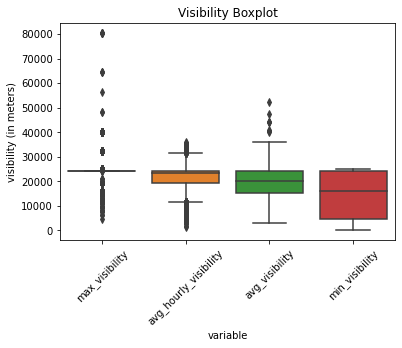

In [43]:
# boxplot for visibility
cols = ['max_visibility','avg_hourly_visibility','avg_visibility','min_visibility']
vis_box_data = data_reduced.melt(id_vars='date', value_vars= cols)
sns.boxplot(x='variable', y='value', data= vis_box_data)
plt.xticks(rotation=45)
plt.ylabel('visibility (in meters)')
plt.title('Visibility Boxplot')
plt.show()

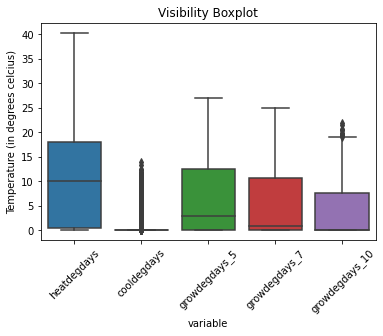

In [44]:
## boxplot for Degree Days 
cols = ['heatdegdays','cooldegdays','growdegdays_5','growdegdays_7','growdegdays_10']
degdays_box_data = data_reduced.melt(id_vars='date', value_vars= cols)
sns.boxplot(x='variable', y='value', data= degdays_box_data)
plt.xticks(rotation=45)
plt.ylabel('Temperature (in degrees celcius)')
plt.title('Visibility Boxplot')
plt.show()

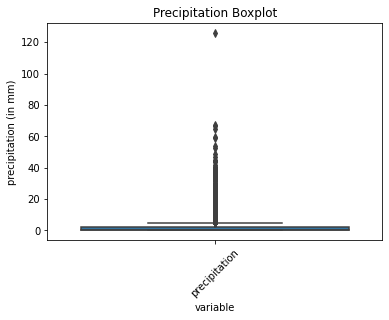

In [45]:
# boxplot for precipitation
cols = ['precipitation']
rain_box_data = data_reduced.melt(id_vars='date', value_vars= cols)
sns.boxplot(x='variable', y='value', data= rain_box_data)
plt.xticks(rotation=45)
plt.ylabel('precipitation (in mm)')
plt.title('Precipitation Boxplot')
plt.show()

In the boxplot above, we see that there are many outiers in the variables related to precipitation; i.e. the precipitation, rain, snow and snow_on_ground variables. This could be due to the fact that there are simply more days in the year where it doesnt rain than days in the year when it rains. Therefore, we should be less concerned about the outliers present in these variables. 

<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
# Exploratory Data Analysis 

### Univariate Analysis of Precipitation 

Text(0.5, 1.0, 'Precipitation Histogram')

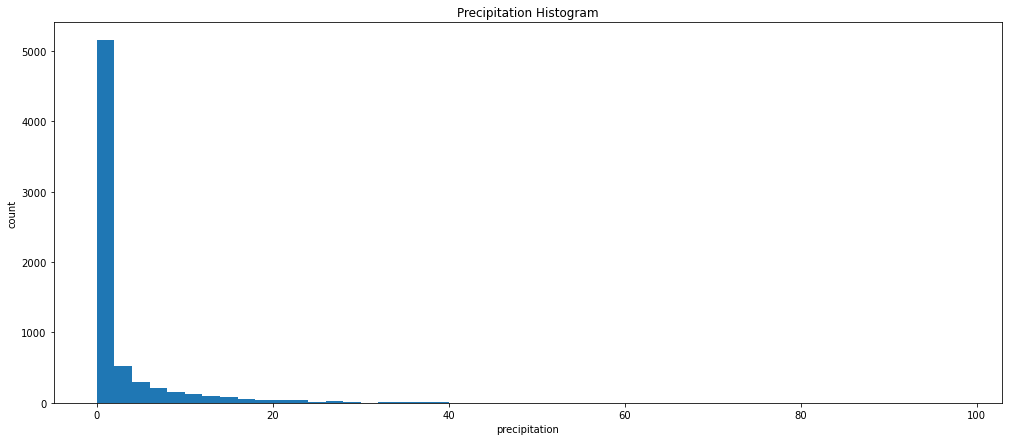

In [61]:
#precipitation histogram
plt.figure(figsize=(17,7))
plt.hist(data_reduced[['precipitation']], bins=np.arange(0,100, step=2))
plt.xlabel('precipitation')
plt.ylabel('count')
plt.title("Precipitation Histogram")

As we take a deeper look into the distribution of the precipitation variables, we see that we do indeed have more days when it does not rains than rainy days in the dataset. 

### Temperature vs Precipitation 

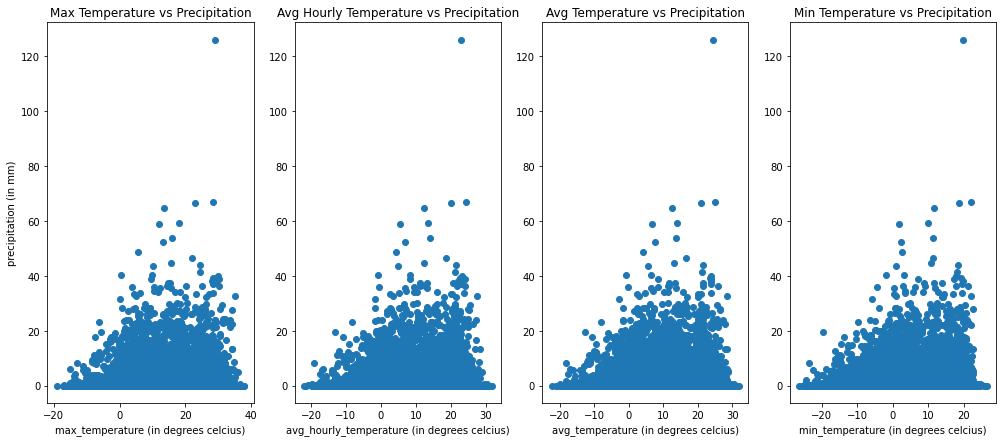

In [47]:
# max temperature scatterplot 
plt.figure(figsize=(17,7))
plt.subplot(1,4,1)
plt.scatter(data_reduced[['max_temperature']], data_reduced[['precipitation']])
plt.xlabel('max_temperature (in degrees celcius)')
plt.ylabel('precipitation (in mm)')
plt.title("Max Temperature vs Precipitation")

# avg hourly temperature scatterplot 
plt.subplot(1,4,2)
plt.scatter(data_reduced[['avg_hourly_temperature']], data_reduced[['precipitation']])
plt.xlabel('avg_hourly_temperature (in degrees celcius)')
plt.title("Avg Hourly Temperature vs Precipitation")

# avg temperature scatterplot
plt.subplot(1,4,3)
plt.scatter(data_reduced[['avg_temperature']], data_reduced[['precipitation']])
plt.xlabel('avg_temperature (in degrees celcius)')
plt.title("Avg Temperature vs Precipitation")

# min temperature scatterplot 
plt.subplot(1,4,4)
plt.scatter(data_reduced[['min_temperature']], data_reduced[['precipitation']])
plt.xlabel('min_temperature (in degrees celcius)')
plt.title("Min Temperature vs Precipitation")
plt.show()

### Humidity vs Precipiation 

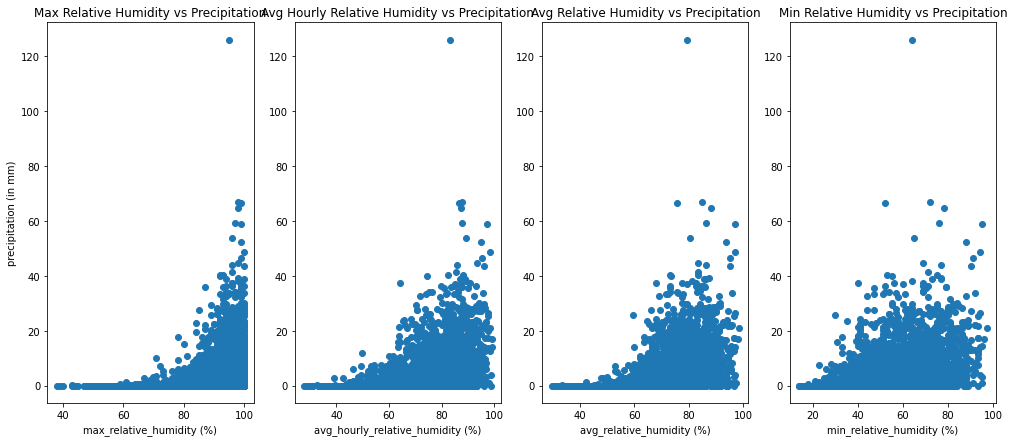

In [48]:
# max humidity scatterplot
plt.figure(figsize=(17,7))
plt.subplot(1,4,1)
plt.scatter(data_reduced[['max_relative_humidity']], data_reduced[['precipitation']])
plt.xlabel('max_relative_humidity (%)')
plt.ylabel('precipitation (in mm)')
plt.title("Max Relative Humidity vs Precipitation")

# avg hourly humidity scatterplot
plt.subplot(1,4,2)
plt.scatter(data_reduced[['avg_hourly_relative_humidity']], data_reduced[['precipitation']])
plt.xlabel('avg_hourly_relative_humidity (%)')
plt.title("Avg Hourly Relative Humidity vs Precipitation")

# avg humidity scatterplot
plt.subplot(1,4,3)
plt.scatter(data_reduced[['avg_relative_humidity']], data_reduced[['precipitation']])
plt.xlabel('avg_relative_humidity (%)')
plt.title("Avg Relative Humidity vs Precipitation")

# min humidity scatterplot
plt.subplot(1,4,4)
plt.scatter(data_reduced[['min_relative_humidity']], data_reduced[['precipitation']])
plt.xlabel('min_relative_humidity (%)')
plt.title("Min Relative Humidity vs Precipitation")
plt.show()

### Dew Point vs Precipitation 

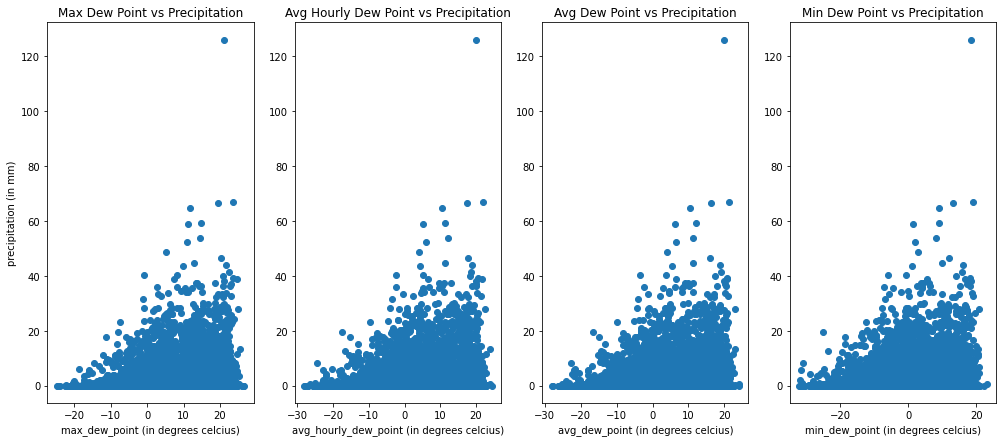

In [49]:
# max dew point
plt.figure(figsize=(17,7))
plt.subplot(1,4,1)
plt.scatter(data_reduced[['max_dew_point']], data_reduced[['precipitation']])
plt.xlabel('max_dew_point (in degrees celcius)')
plt.ylabel('precipitation (in mm)')
plt.title("Max Dew Point vs Precipitation")

# avg hourly dew point 
plt.subplot(1,4,2)
plt.scatter(data_reduced[['avg_hourly_dew_point']], data_reduced[['precipitation']])
plt.xlabel('avg_hourly_dew_point (in degrees celcius)')
plt.title("Avg Hourly Dew Point vs Precipitation")

# avg dew point 
plt.subplot(1,4,3)
plt.scatter(data_reduced[['avg_dew_point']], data_reduced[['precipitation']])
plt.xlabel('avg_dew_point (in degrees celcius)')
plt.title("Avg Dew Point vs Precipitation")

# min dew point 
plt.subplot(1,4,4)
plt.scatter(data_reduced[['min_dew_point']], data_reduced[['precipitation']])
plt.xlabel('min_dew_point (in degrees celcius)')
plt.title("Min Dew Point vs Precipitation")
plt.show()

### Wind Speed vs Precipitation 

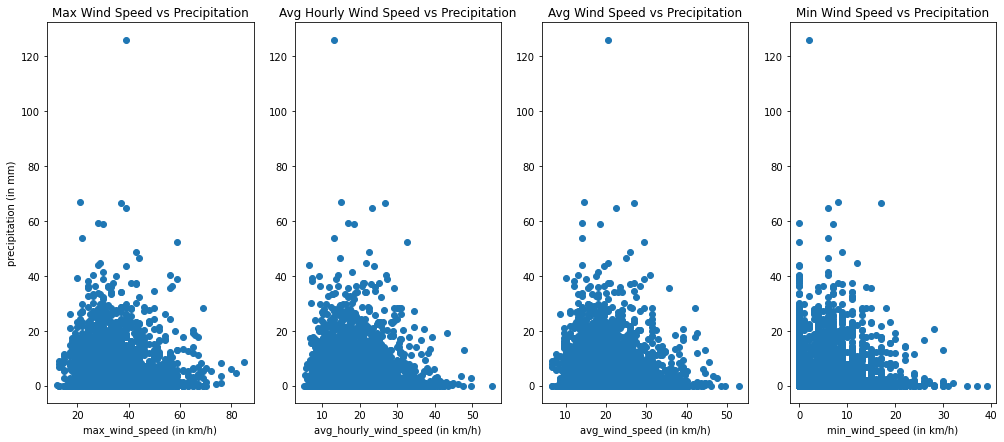

In [50]:
# max wind speed scatterplot 
plt.figure(figsize=(17,7))
plt.subplot(1,4,1)
plt.scatter(data_reduced[['max_wind_speed']], data_reduced[['precipitation']])
plt.xlabel('max_wind_speed (in km/h)')
plt.ylabel('precipitation (in mm)')
plt.title("Max Wind Speed vs Precipitation")

#avg hourly wind speed scatterplot 
plt.subplot(1,4,2)
plt.scatter(data_reduced[['avg_hourly_wind_speed']], data_reduced[['precipitation']])
plt.xlabel('avg_hourly_wind_speed (in km/h)')
plt.title("Avg Hourly Wind Speed vs Precipitation")

# avg wind speed scatterplot 
plt.subplot(1,4,3)
plt.scatter(data_reduced[['avg_wind_speed']], data_reduced[['precipitation']])
plt.xlabel('avg_wind_speed (in km/h)')
plt.title("Avg Wind Speed vs Precipitation")

# min wind speed scatterplot 
plt.subplot(1,4,4)
plt.scatter(data_reduced[['min_wind_speed']], data_reduced[['precipitation']])
plt.xlabel('min_wind_speed (in km/h)')
plt.title("Min Wind Speed vs Precipitation")
plt.show()

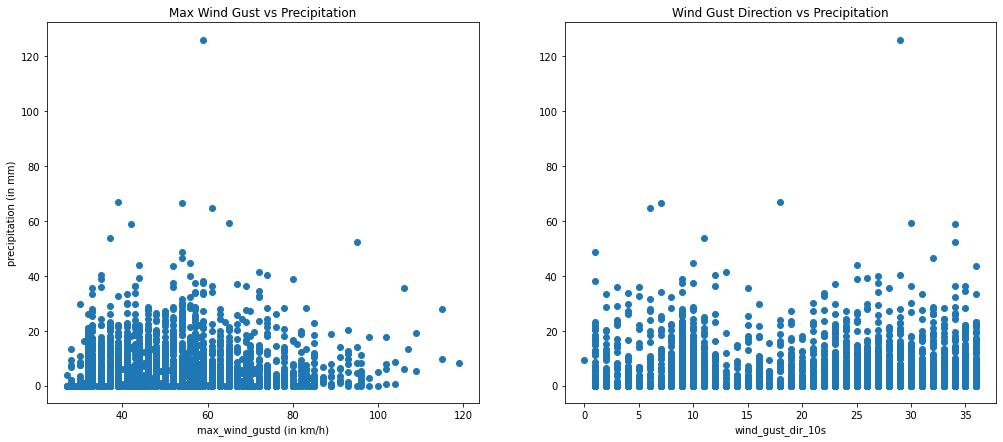

In [51]:
#max wind gust 
plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
plt.scatter(data_reduced[['max_wind_gust']], data_reduced[['precipitation']])
plt.xlabel('max_wind_gustd (in km/h)')
plt.ylabel('precipitation (in mm)')
plt.title("Max Wind Gust vs Precipitation")

# wind direction 
plt.subplot(1,2,2)
plt.scatter(data_reduced[['wind_gust_dir_10s']], data_reduced[['precipitation']])
plt.xlabel('wind_gust_dir_10s')
plt.title("Wind Gust Direction vs Precipitation")
plt.show()

### Sea Pressure vs Precipitation 

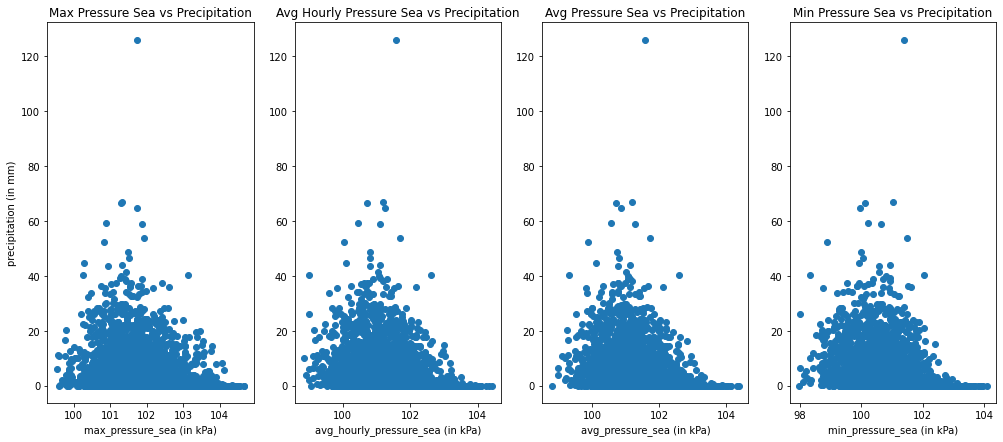

In [52]:
# max sea-level pressure scatterplot
plt.figure(figsize=(17,7))
plt.subplot(1,4,1)
plt.scatter(data_reduced[['max_pressure_sea']], data_reduced[['precipitation']])
plt.xlabel('max_pressure_sea (in kPa)')
plt.ylabel('precipitation (in mm)')
plt.title("Max Pressure Sea vs Precipitation")

# avg hourly sea-level pressure scatterplot
plt.subplot(1,4,2)
plt.scatter(data_reduced[['avg_hourly_pressure_sea']], data_reduced[['precipitation']])
plt.xlabel('avg_hourly_pressure_sea (in kPa)')
plt.title("Avg Hourly Pressure Sea vs Precipitation")

# avg sea-level pressure scatterplot
plt.subplot(1,4,3)
plt.scatter(data_reduced[['avg_pressure_sea']], data_reduced[['precipitation']])
plt.xlabel('avg_pressure_sea (in kPa)')
plt.title("Avg Pressure Sea vs Precipitation")

# min sea-level pressure scatterplot
plt.subplot(1,4,4)
plt.scatter(data_reduced[['min_pressure_sea']], data_reduced[['precipitation']])
plt.xlabel('min_pressure_sea (in kPa)')
plt.title("Min Pressure Sea vs Precipitation")
plt.show()

### Station Pressure vs Precipitation

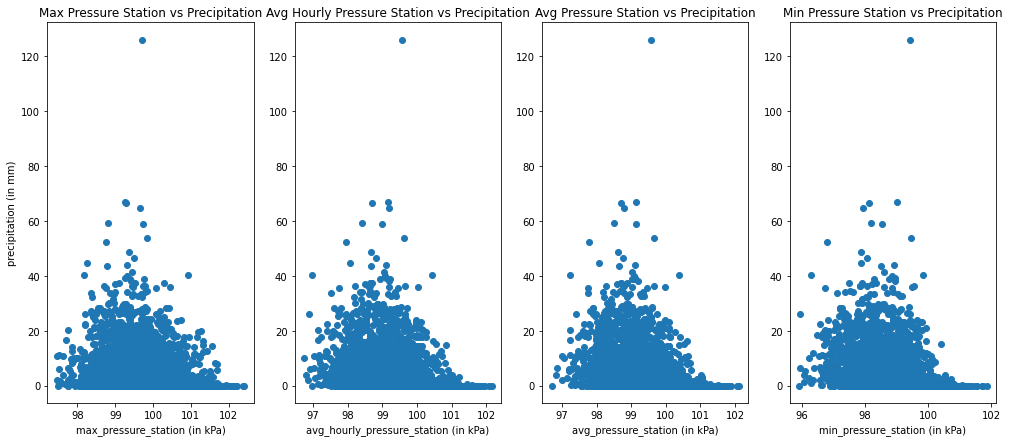

In [53]:
# max station pressure scatterplot 
plt.figure(figsize=(17,7))
plt.subplot(1,4,1)
plt.scatter(data_reduced[['max_pressure_station']], data_reduced[['precipitation']])
plt.xlabel('max_pressure_station (in kPa)')
plt.ylabel('precipitation (in mm)')
plt.title("Max Pressure Station vs Precipitation")

# avg hourly station pressure scatterplot 
plt.subplot(1,4,2)
plt.scatter(data_reduced[['avg_hourly_pressure_station']], data_reduced[['precipitation']])
plt.xlabel('avg_hourly_pressure_station (in kPa)')
plt.title("Avg Hourly Pressure Station vs Precipitation")

# avg station pressure scatterplot 
plt.subplot(1,4,3)
plt.scatter(data_reduced[['avg_pressure_station']], data_reduced[['precipitation']])
plt.xlabel('avg_pressure_station (in kPa)')
plt.title("Avg Pressure Station vs Precipitation")

# min station pressure scatterplot 
plt.subplot(1,4,4)
plt.scatter(data_reduced[['min_pressure_station']], data_reduced[['precipitation']])
plt.xlabel('min_pressure_station (in kPa)')
plt.title("Min Pressure Station vs Precipitation")
plt.show()

### Visibility vs Precipitation

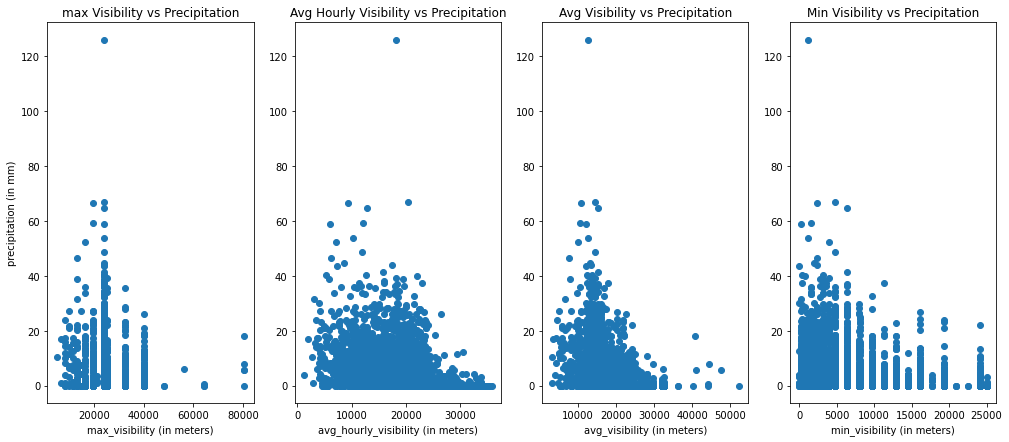

In [54]:
# max visibility scatterplot
plt.figure(figsize=(17,7))
plt.subplot(1,4,1)
plt.scatter(data_reduced[['max_visibility']], data_reduced[['precipitation']])
plt.xlabel('max_visibility (in meters)')
plt.ylabel('precipitation (in mm)')
plt.title("max Visibility vs Precipitation")

# avg horuly visibility scatterplot 
plt.subplot(1,4,2)
plt.scatter(data_reduced[['avg_hourly_visibility']], data_reduced[['precipitation']])
plt.xlabel('avg_hourly_visibility (in meters)')
plt.title("Avg Hourly Visibility vs Precipitation")

# avg visibility scatterplot
plt.subplot(1,4,3)
plt.scatter(data_reduced[['avg_visibility']], data_reduced[['precipitation']])
plt.xlabel('avg_visibility (in meters)')
plt.title("Avg Visibility vs Precipitation")

# min visibility scatterplot
plt.subplot(1,4,4)
plt.scatter(data_reduced[['min_visibility']], data_reduced[['precipitation']])
plt.xlabel('min_visibility (in meters)')
plt.title("Min Visibility vs Precipitation")
plt.show()

### precipitation over time 

In [87]:
def extract_date_elements(dataset):
    '''
    Extract the month, year, qtr and week of the year from the date element. 
    Qtrs codebok: {1: Winter, 2: Spring, 3: Summer, 4: Fall}
    '''
    #create storage for the date values of each observation
    years = []
    months = []
    # iterate through each row to extract dates, if a null exists add it for all components of the date 
    for row in dataset["date"]:
        if str(row) != 'nan':
            row = str(row)[:10]
            year = int(row[:4])
            month = int(row[5:7])
            years.append(year)
            months.append(month)
        else:
            years.append(row)
            months.append(row)
    #alter the original dataset by added the decomposed date info into individual columns 
    dataset["Year"] = years
    dataset["Month"] = months
    #convert the str representing a date into a  date object
    dates = pd.to_datetime(dataset.date)
    #extract info about financial quarters 
    dataset["Season"] = dates.dt.quarter
    dataset["WkofYr"] = dates.dt.weekofyear
    return dataset

In [88]:
date_precip_df = data_reduced[['date','precipitation']]
extract_date_elements(date_precip_df)

<ipython-input-87-3d6b3bf1b4fb>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Year"] = years
<ipython-input-87-3d6b3bf1b4fb>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Month"] = months
<ipython-input-87-3d6b3bf1b4fb>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

,date,precipitation,Year,Month,Season,WkofYr
0,2021-06-29,23.20,2021,6,2,26
1,2021-06-28,3.00,2021,6,2,26
2,2021-06-27,0.00,2021,6,2,25
3,2021-06-26,5.60,2021,6,2,25
4,2021-06-25,16.40,2021,6,2,25
...,...,...,...,...,...,...
9991,1994-02-20,0.00,1994,2,1,7
9995,1994-02-16,0.00,1994,2,1,7
9996,1994-02-15,0.00,1994,2,1,7
9998,1994-02-13,1.60,1994,2,1,6


### Average Precipitation Every Month 

In [89]:
#calculating the average preciptation of every month 
month_df = date_precip_df.groupby(['Month'], as_index=False).mean()
month_df.sort_values('Month')
month_df

,Month,precipitation,Year,Season,WkofYr
0,1,2.13,2008.33,1.00,4.31
1,2,2.12,2008.37,1.00,6.95
2,3,1.79,2008.31,1.00,11.16
3,4,2.90,2008.06,2.00,15.56
4,5,2.99,2008.07,2.00,19.89
5,6,3.20,2008.90,2.00,24.29
6,7,2.65,2007.71,3.00,28.54
7,8,2.50,2008.28,3.00,33.00
8,9,3.18,2007.45,3.00,37.45
9,10,2.80,2007.98,4.00,41.80


Text(0, 0.5, 'Precipitation (in mm)')

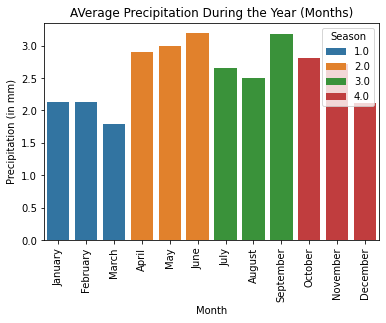

In [104]:
months = ['January', 'February', 'March', 'April', 'May', 'June',
          'July', 'August', 'September', 'October', 'November', 'December'] # month labels 

sns.barplot(x="Month", y="precipitation", hue="Season", data=month_df, dodge=False)
plt.xticks(np.arange(0, 12), months, rotation=90) # convert numbers to months 
plt.title('AVerage Precipitation During the Year (Months)')
plt.ylabel('Precipitation (in mm)')

### Most Precipitation Ever Recorded for Every Month 

In [105]:
month_df = date_precip_df.groupby(['Month'], as_index=False).max()
month_df

,Month,date,precipitation,Year,Season,WkofYr
0,1,2021-01-31,59.00,2021,1,53
1,2,2021-02-28,40.40,2021,1,9
2,3,2021-03-31,34.60,2021,1,14
3,4,2021-04-30,40.20,2021,2,18
4,5,2021-05-31,59.40,2021,2,23
5,6,2021-06-29,53.80,2021,2,27
6,7,2020-07-30,126.00,2020,3,31
7,8,2020-08-31,41.40,2020,3,36
8,9,2020-09-30,66.40,2020,3,40
9,10,2020-10-31,64.80,2020,4,44


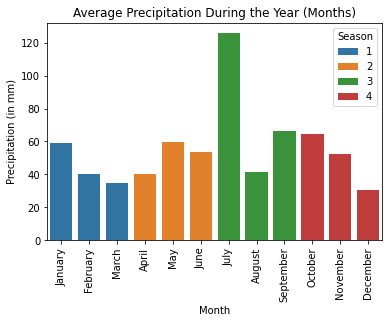

In [109]:
sns.barplot(x="Month", y="precipitation", hue="Season", data=month_df, dodge=False)
plt.xticks(np.arange(0, 12), months, rotation=90)
plt.xlabel('Month')
plt.ylabel('Precipitation (in mm)')
plt.title('Average Precipitation During the Year (Months)')
plt.show()

### Number of Raindays in Each Month on Average

In [117]:
#get every day in the dataset where there is precipiation 
wet_days = date_precip_df.loc[date_precip_df.precipitation > 0]
wet_days

,date,precipitation,Year,Month,Season,WkofYr
0,2021-06-29,23.20,2021,6,2,26
1,2021-06-28,3.00,2021,6,2,26
3,2021-06-26,5.60,2021,6,2,25
4,2021-06-25,16.40,2021,6,2,25
8,2021-06-21,5.80,2021,6,2,25
...,...,...,...,...,...,...
9985,1994-02-26,0.40,1994,2,1,8
9986,1994-02-25,1.40,1994,2,1,8
9988,1994-02-23,9.40,1994,2,1,8
9998,1994-02-13,1.60,1994,2,1,6


In [118]:
#count the cumulative number of wet days in each month
wet_count = wet_days.groupby(['Month'], as_index=False).count()
wet_count 

,Month,date,precipitation,Year,Season,WkofYr
0,1,341,341,341,341,341
1,2,282,282,282,282,282
2,3,256,256,256,256,256
3,4,315,315,315,315,315
4,5,271,271,271,271,271
5,6,227,227,227,227,227
6,7,208,208,208,208,208
7,8,185,185,185,185,185
8,9,211,211,211,211,211
9,10,263,263,263,263,263


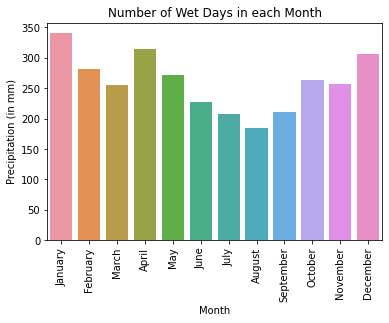

In [119]:
sns.barplot(x="Month", y="precipitation", data=wet_count, dodge=False)
plt.xticks(np.arange(0, 12), months, rotation=90)
plt.xlabel('Month')
plt.ylabel('Precipitation (in mm)')
plt.title('Number of Wet Days in each Month')
plt.show()

### Average Precipitation Every Season

In [92]:
season_df = date_precip_df.groupby(['Season'], as_index=False).mean()
season_df

,Season,precipitation,Year,Month,WkofYr
0,1,2.01,2008.34,2.00,7.48
1,2,3.02,2008.32,4.94,19.67
2,3,2.76,2007.82,7.94,32.72
3,4,2.53,2007.62,11.03,45.62


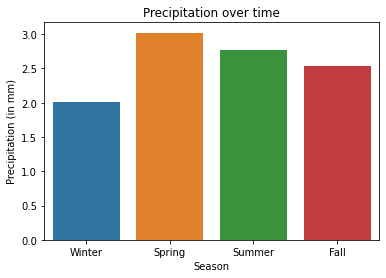

In [114]:
seasons = ['Winter', 'Spring', 'Summer', 'Fall'] # season labels 

sns.barplot(x="Season", y="precipitation", data=season_df, dodge=False)
plt.xticks(np.arange(0, 4), seasons) # convert numbers to seasons 
plt.xlabel('Season')
plt.ylabel('Precipitation (in mm)')
plt.title('Precipitation over time')
plt.show()

### Pairplot of Dataset 

In [110]:
#graph = sns.pairplot(data_reduced)
#graph.fig.suptitle("Reduced Dataset Pair-Plot")
#plt.show()